In [ ]:
import pandas as pd
import numpy as np
# import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# 1. Load the dataset
data = pd.read_csv("imdb.csv")  # Make sure this file is in the same directory
# def clean_text(text):
#     text = re.sub("<.*?>", "", text)        # Remove HTML tags
#     text = re.sub("[^a-zA-Z]", " ", text)   # Keep letters only
#     text = text.lower()                     # Lowercase
#     return text


In [ ]:

# 2. Split features and labels
# texts = data['review'].apply(clean_text)    #used with tokenizer  
texts = data['review'].values
labels = data['sentiment'].map({'positive': 1, 'negative': 0}).values  # Convert text labels to 0 and 1


In [95]:

# 3. Convert text to numeric vectors using Tokenizer (Bag-of-Words)
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
x_data = tokenizer.texts_to_matrix(texts, mode='binary')  # Each review becomes a 10000-dim vector


# # Step 3: Vectorize text using Bag of Words
# vectorizer = CountVectorizer(max_features=10000)
# X = vectorizer.fit_transform(data['review']).toarray()
# y = data['sentiment'].values

In [96]:

# 4. Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=42)


In [97]:
# 5. Build the model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))  #50% neurons randomly turned off
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))  #80% neurons randomly turned off
model.add(Dense(1, activation='sigmoid'))


c:\Users\sumit\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:

# 6. Compile the model
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])


In [99]:

# 7. Train the model

history = model.fit(x_train, y_train, validation_split=0.3, epochs=20, batch_size=512,  verbose=1)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.6873 - mae: 0.4941 - val_loss: 0.6192 - val_mae: 0.4597
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6171 - mae: 0.4463 - val_loss: 0.4871 - val_mae: 0.3750
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.5300 - mae: 0.3806 - val_loss: 0.3747 - val_mae: 0.2880
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.4584 - mae: 0.3239 - val_loss: 0.3165 - val_mae: 0.2340
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3996 - mae: 0.2813 - val_loss: 0.2858 - val_mae: 0.1967
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3622 - mae: 0.2522 - val_loss: 0.2766 - val_mae: 0.1819
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3351 - mae: 0.2287 - val_loss: 0.2710 - val_mae: 0.1652
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3076 - mae: 0.2111 - val_loss: 0.2737 - val_mae: 0.1510
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.289

<Axes: title={'center': 'epochs vs loss'}, xlabel='Epochs', ylabel='Loss'>

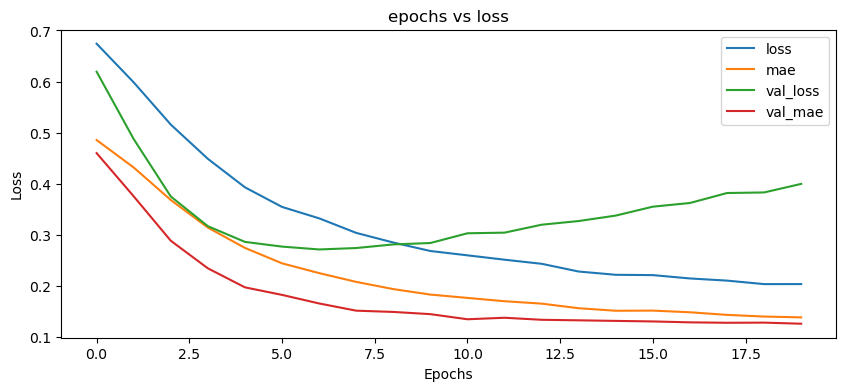

In [103]:

# 8. Plot loss
pd.DataFrame(history.history).plot(figsize=(10,4), xlabel="Epochs", ylabel="Loss", title="epochs vs loss")

In [104]:

# 9. Predict on test data
predictions = model.predict(x_test)
print(predictions[:5])  # Show first 5 predicted probabilities

# Round to 3 decimal places and flatten for easier viewing
rounded_preds = np.round(predictions.flatten(), 3)
print("Predicted probabilities:", rounded_preds)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[9.9859104e-02]
 [9.9969620e-01]
 [2.7670800e-03]
 [9.9929482e-01]
 [8.9975505e-04]]
Predicted probabilities: [0.1   1.    0.003 ... 0.    1.    0.999]
